# Exploratory Data Analysis (EDA):
1.Load the Titanic dataset using Python's pandas library.                        
2.Check for missing values.                                                      
3.Explore data distributions using histograms and box plots.                     
4.Visualize relationships between features and survival using scatter plots and bar plots.


In [54]:
import pandas as pd

# Load the Titanic train and test dataset
train_df = pd.read_csv('https://raw.githubusercontent.com/Shrikrishna-jadhavar/Data-Science-Material/main/Dataset/Titanic_train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/Shrikrishna-jadhavar/Data-Science-Material/main/Dataset/Titanic_test.csv')

# Display the first five rows of the train dataset to understand its structure.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
test_df.head()  # Display the first five rows of the test dataset.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
# Check for missing values in the training and test datasets
missing_values_train = train_df.isnull().sum()  # This will give the count of missing values in each column.
missing_values_test = test_df.isnull().sum()

missing_values_train  # Display the missing values count for the training dataset.

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [57]:
missing_values_test  # Display the missing values count for the test dataset.

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


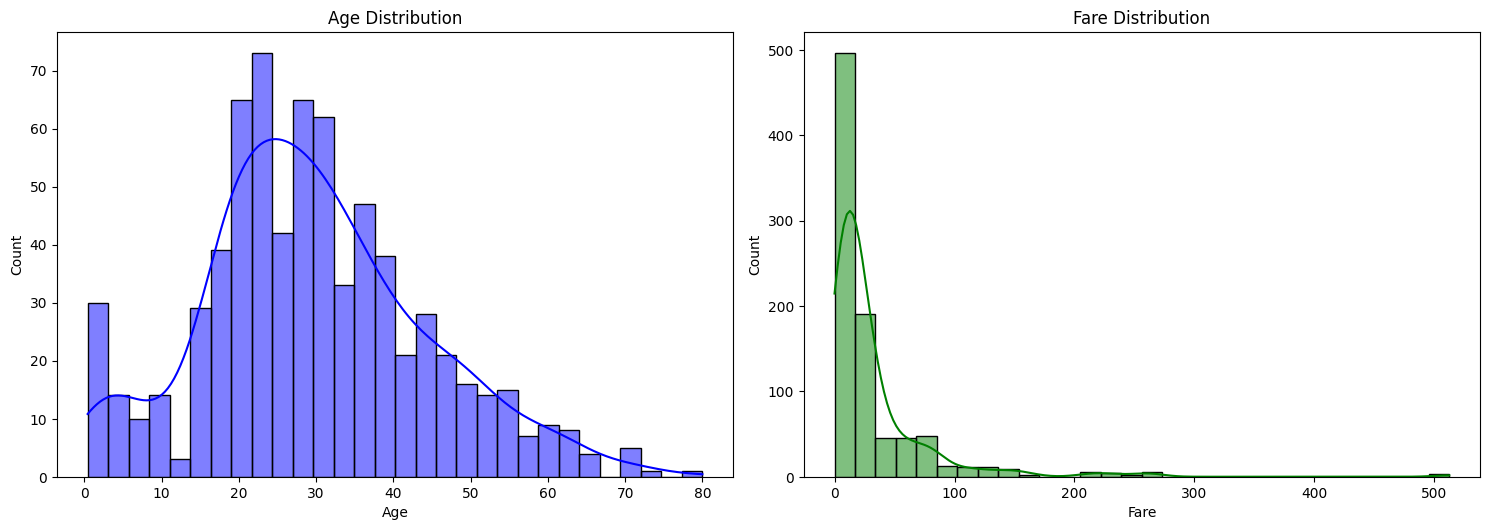

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Set up the visualizations
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed.

# Histograms for numeric features in the training dataset
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, plot number 1, plt. subplot takes three arguments.
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30, color='blue')  # kde=True adds a kernel density estimate.
plt.title('Age Distribution')  # Set the title of the plot.

plt.subplot(2, 2, 2)  # 2 rows, 2 columns, plot number 2
sns.histplot(train_df['Fare'], kde=True, bins=30, color='green')
plt.title('Fare Distribution')

plt.tight_layout()  # Adjusts the spacing between subplots.
plt.show()  # Display the plot.

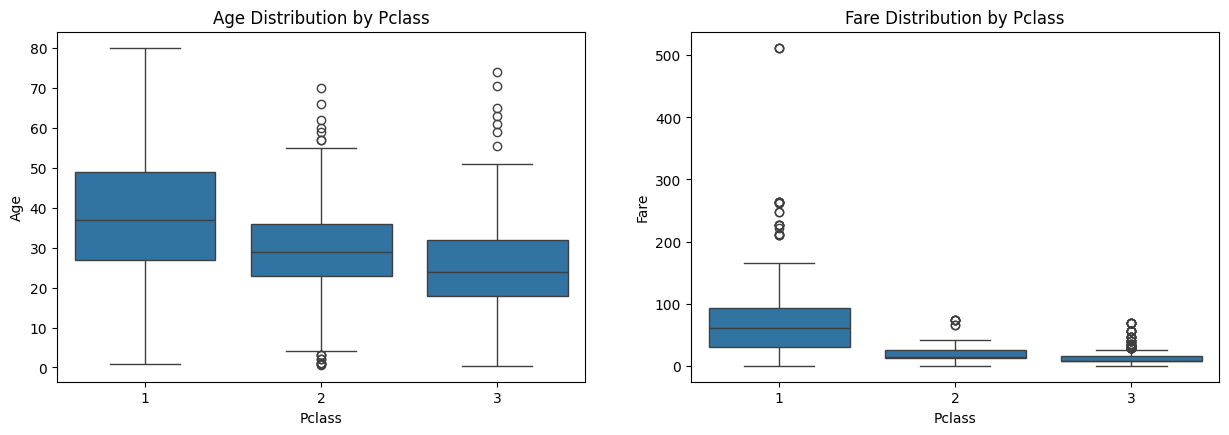

In [59]:
# Set up the visualizations
plt.figure(figsize=(15, 10))

# Box plots for numeric features in the training dataset
plt.subplot(2, 2, 3)
sns.boxplot(x='Pclass', y='Age', data=train_df)  # Box plot of Age by Pclass.
plt.title('Age Distribution by Pclass')  # Set the title of the plot.

plt.subplot(2, 2, 4)
sns.boxplot(x='Pclass', y='Fare', data=train_df)  # Box plot of Fare by Pclass.
plt.title('Fare Distribution by Pclass')

plt.show()

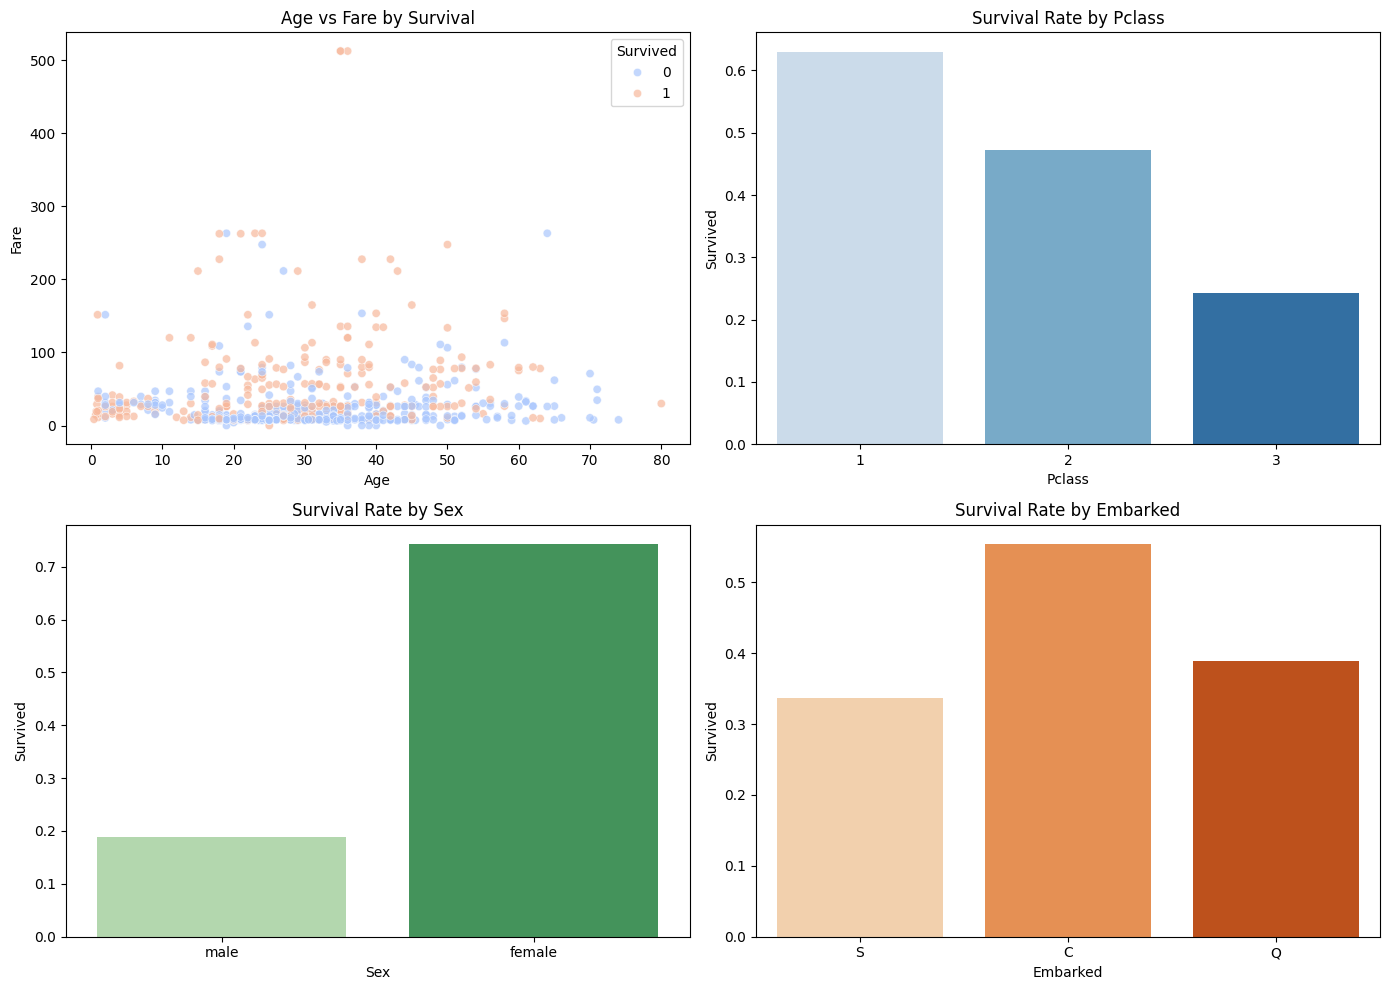

In [60]:
# Set up the visualizations
plt.figure(figsize=(14, 10))

# Scatter plot: Age vs Fare colored by Survival
plt.subplot(2, 2, 1)
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df, palette='coolwarm', alpha=0.7)  # alpha controls transparency.
plt.title('Age vs Fare by Survival')  # Set the title of the plot.

# Bar plot: Survival rate by Pclass
plt.subplot(2, 2, 2)
sns.barplot(x='Pclass', y='Survived', data=train_df, ci=None, palette='Blues')  # ci=None hides confidence intervals.
plt.title('Survival Rate by Pclass')

# Bar plot: Survival rate by Sex
plt.subplot(2, 2, 3)
sns.barplot(x='Sex', y='Survived', data=train_df, ci=None, palette='Greens')
plt.title('Survival Rate by Sex')

# Bar plot: Survival rate by Embarked
plt.subplot(2, 2, 4)
sns.barplot(x='Embarked', y='Survived', data=train_df, ci=None, palette='Oranges')
plt.title('Survival Rate by Embarked')

plt.tight_layout()
plt.show()


#Data Preprocessing:
1.Impute missing values.                                                         
2.Encode categorical variables using one-hot encoding or label encoding.         
3.If needed you can apply more preprocessing methods on the given dataset.


In [61]:
from sklearn.impute import SimpleImputer

# Impute Age
age_imputer = SimpleImputer(strategy='median')  #Use the median to fill missing values.
train_df['Age'] = age_imputer.fit_transform(train_df[['Age']])  # Fit and transform the 'Age' column in the training dataset.
test_df['Age'] = age_imputer.transform(test_df[['Age']])  # Transform the 'Age' column in the test dataset.

# Impute Embarked
embarked_imputer = SimpleImputer(strategy='most_frequent')  # Use the most frequent value to fill missing values.
#The fit_transform method was returning a 2D array. This has been fixed by using ravel() to flatten the array.
train_df['Embarked'] = embarked_imputer.fit_transform(train_df[['Embarked']]).ravel()
test_df['Embarked'] = embarked_imputer.transform(test_df[['Embarked']]).ravel()

# Impute Fare in test set
fare_imputer = SimpleImputer(strategy='median')  # Use the median to fill missing values.
test_df['Fare'] = fare_imputer.fit_transform(test_df[['Fare']])  # Fit and transform the 'Fare' column in the test dataset.

In [62]:
# Drop unnecessary columns.
train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)  # Drop unnecessary columns from the training dataset.
test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)   # Drop unnecessary columns from the testing dataset.

In [63]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [64]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [65]:
# One-hot encode categorical variables.
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

In [66]:
train_df.head()  # Display the first five rows of the updated training dataset.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [67]:
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,True,True,False
1,893,3,47.0,1,0,7.0000,False,False,True
2,894,2,62.0,0,0,9.6875,True,True,False
3,895,3,27.0,0,0,8.6625,True,False,True
4,896,3,22.0,1,1,12.2875,False,False,True


# Building Predictive Models :
1.Split the preprocessed dataset into training and testing sets.                 
2.Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.                                                  
3.Build predictive models using LightGBM and XGBoost algorithms.                 
4.Train the models on the training set and evaluate their performance on the testing set.                                                                     
5.Use techniques like cross-validation and hyperparameter tuning to optimize model performance.


In [82]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Survived', axis=1)  # Features
y = train_df['Survived']  # 'Survived' is the Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
import lightgbm as lgb  # Import LightGBM - Light Gradient Boosting Machine.
import xgboost as xgb   # Import XGBoost - Extreme Gradient Boosting.
import warnings
warnings.filterwarnings('ignore')

# LightGBM model
lgb_model = lgb.LGBMClassifier(force_row_wise=True)  # Initialize the LightGBM model.
lgb_model.fit(X_train, y_train)  # Fit the model on the training data.
lgb_predictions = lgb_model.predict(X_test)  # Predict on the test set.

# XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', force_row_wise=True)  # Initialize the XGBoost model.
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Import evaluation metrics.

def evaluate_model(predictions, y_test):  # Function to evaluate the model.
    accuracy = accuracy_score(y_test, predictions)  # Calculate accuracy.     Accuracy: The proportion of correct predictions.
    precision = precision_score(y_test, predictions)  # Calculate precision.  Precision: The proportion of true positive predictions among all positive predictions.
    recall = recall_score(y_test, predictions)  # Calculate recall.           Recall: The proportion of true positives correctly identified.
    f1 = f1_score(y_test, predictions)  # Calculate F1-score.                 F1-Score: The harmonic mean of precision and recall.

    return accuracy, precision, recall, f1  # Return the evaluation metrics.

lgb_accuracy, lgb_precision, lgb_recall, lgb_f1 = evaluate_model(lgb_predictions, y_test)  # Evaluate LightGBM model.
print(f"LightGBM - Accuracy: {lgb_accuracy}, Precision: {lgb_precision}, Recall: {lgb_recall}, F1-Score: {lgb_f1}")  # Print the evaluation metrics.

xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = evaluate_model(xgb_predictions, y_test)  # Evaluate XGBoost model.
print(f"XGBoost - Accuracy: {xgb_accuracy}, Precision: {xgb_precision}, Recall: {xgb_recall}, F1-Score: {xgb_f1}")  # Print the evaluation metrics.

LightGBM - Accuracy: 0.7988826815642458, Precision: 0.7794117647058824, Recall: 0.7162162162162162, F1-Score: 0.7464788732394366
XGBoost - Accuracy: 0.7932960893854749, Precision: 0.7534246575342466, Recall: 0.7432432432432432, F1-Score: 0.7482993197278911


In [85]:
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning.

# Hyperparameter tuning for LightGBM.
lgb_params = {                 # Parameter grid for LightGBM.
    'num_leaves': [31, 50],    # Number of leaves in the tree.
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate.
    'n_estimators': [100, 200]  # Number of trees.
}

# Hyperparameter grid for LightGBM.
lgb_grid = GridSearchCV(lgb.LGBMClassifier(force_row_wise = True), lgb_params, cv=5, scoring='accuracy')  # Initialize GridSearchCV.
lgb_grid.fit(X_train, y_train)  # Fit the grid search to the training data.
print(f"Best params for LightGBM: {lgb_grid.best_params_}")  # Print the best parameters found by the grid search.

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [86]:
# Hyperparameter tuning for XGBoost
xgb_params = {                          # Parameter grid for XGBoost.
    'max_depth': [3, 5, 7],             # Maximum depth of each tree.
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]            # Subsample ratio of training instances.
}
# Hyperparameter grid for XGBoost.
xgb_grid = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, cv=5, scoring='accuracy')  # Initialize GridSearchCV.
xgb_grid.fit(X_train, y_train)
print(f"Best params for XGBoost: {xgb_grid.best_params_}")


Best params for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


#Comparative Analysis :
1.Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.                                                     
2.Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.


In [80]:
import pandas as pd

# Collecting the performance metrics into a DataFrame
metrics_df = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],          # Names of the models.
    'Accuracy': [lgb_accuracy, xgb_accuracy],  # Accuracy scores.
    'Precision': [lgb_precision, xgb_precision],
    'Recall': [lgb_recall, xgb_recall],
    'F1-Score': [lgb_f1, xgb_f1]
})

print(metrics_df)  # Display the DataFrame

      Model  Accuracy  Precision    Recall  F1-Score
0  LightGBM  0.798883   0.779412  0.716216  0.746479
1   XGBoost  0.793296   0.753425  0.743243  0.748299


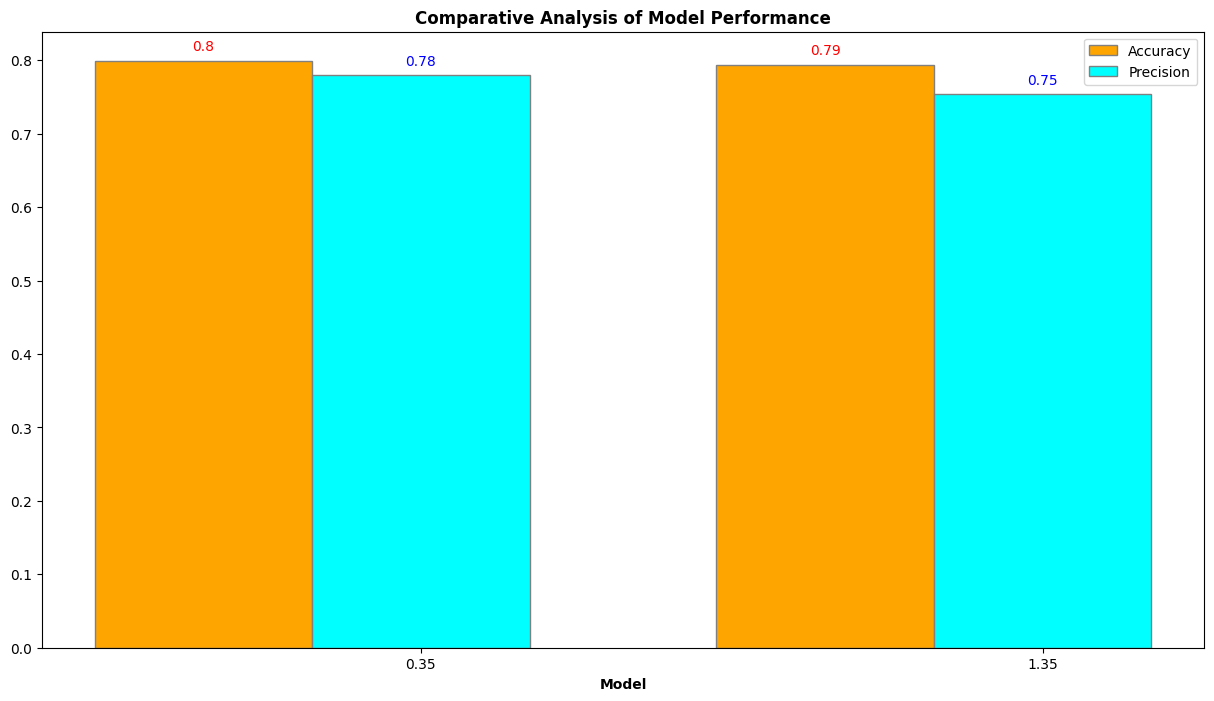

In [81]:
import matplotlib.pyplot as plt

bar_width = 0.35  # Width of each bar.
r1 = range(len(metrics_df))  # Range for the first set of bars.
r2 = [x + bar_width for x in r1]  # Range for the second set of bars.

plt.figure(figsize=(15,8))  # Create a figure with a specified size.

# Plotting the metrics
plt.bar(r1, metrics_df['Accuracy'], color='orange', width = bar_width, edgecolor = 'grey', label = 'Accuracy')  # Accuracy.

plt.bar(r2, metrics_df['Precision'], color='cyan', width = bar_width, edgecolor = 'grey', label = 'Precision')  # Precision.

# Adding Xticks - xticks (ticks) sets the x-axis tick values, which are the locations along the x-axis where the tick marks appear. Specify ticks as a vector of increasing values; for example, [0 2 4 6]

plt.xlabel('Model', fontweight = 'bold')  # Label for the x-axis.
plt.xticks([r + bar_width for r in range(len(metrics_df))]), metrics_df['Model']  # Set the x-axis ticks.

# Adding labels
for i in range (len(metrics_df)):  # Iterate through the rows of the DataFrame.
    plt.text(i, metrics_df['Accuracy'][i] + 0.01, round(metrics_df['Accuracy'][i],2), ha = 'center', va = 'bottom', color = 'red')  # Accuracy. ha-horizontalalignment (default: left ) and va-verticalalignment (default: baseline .)
    plt.text(i + bar_width, metrics_df['Precision'][i] + 0.01, round(metrics_df['Precision'][i],2), ha = 'center', va = 'bottom', color = 'blue')  # Precision.

plt.legend()  # Display the legend - A legend is used to describe elements for a particular area of a graph.
plt.title('Comparative Analysis of Model Performance',fontweight = 'bold')  # Title of the plot.
plt.show()  # Display the plot.

#Interpretation :
Accuracy :                                                                       
Definition : The proportion of correctly classified instances (both positive and negative) out of the total instances.                                        
Interpretation : A higher accuracy indicates that the model is generally making correct predictions. However, accuracy alone may not be sufficient, especially if the data is imbalanced.

Precision :                                                                      
Definition: The proportion of true positive predictions among all positive predictions.                                                                     
Interpretation : Higher precision means that when the model predicts a positive outcome (e.g., survival), it is more likely to be correct. This is crucial in scenarios where the cost of a false positive is high.

Recall :                                                                         
Definition: The proportion of actual positives correctly identified by the model.                                                                           
Interpretation : Higher recall indicates that the model is good at identifying positive cases (e.g., correctly identifying survivors). This is important when missing a positive case has a high cost.

F1-Score :                                                                       
Definition : The harmonic mean of precision and recall.                          
Interpretation : A higher F1-score means the model balances precision and recall well, which is particularly important in imbalanced datasets.

**Strengths :**

LightGBM :                                                                       
Accuracy : Slightly higher accuracy suggests that LightGBM is marginally better at making correct predictions overall.                                           
Recall: Higher recall means LightGBM is more effective at identifying actual positives, which could be crucial if the problem is sensitive to missing positive cases.

XGBoost :                                                                        
Precision : Slightly higher precision indicates that XGBoost is better at minimizing false positives. This could be important if the cost of incorrectly predicting a positive (e.g., predicting survival when it’s not the case) is high.

**Weaknesses :**

LightGBM :                                                                       
Precision : Slightly lower precision compared to XGBoost means LightGBM might produce more false positives, which could be a downside if precision is more critical in your application.

XGBoost :                                                                        
Recall : Slightly lower recall suggests that XGBoost might miss some positive cases. If your application values identifying as many true positives as possible (e.g., not missing any survivors), this could be a drawback.

**Conclusion :**

If your application prioritizes recall (e.g., identifying survivors even at the cost of some false positives), LightGBM might be the better choice.

If your application values precision (e.g., ensuring that when you predict survival, it’s likely correct), XGBoost might be more appropriate.

